<a href="https://colab.research.google.com/github/fdfatihdemir/Deep_Learning/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_D1123_Fatih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [75]:
!python --version

Python 3.7.13


In [76]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [78]:
#from google.colab import drive
#drive.mount('/content/drive/My Drive/')

In [79]:
df = pd.read_csv("/content/drive/My Drive/DEEP_LEARNING/DL-Assingment-1_D1123-Fatih/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [81]:
df.isnull().sum().any()

False

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [83]:
df = df.drop('RowNumber', axis = 1)

In [84]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


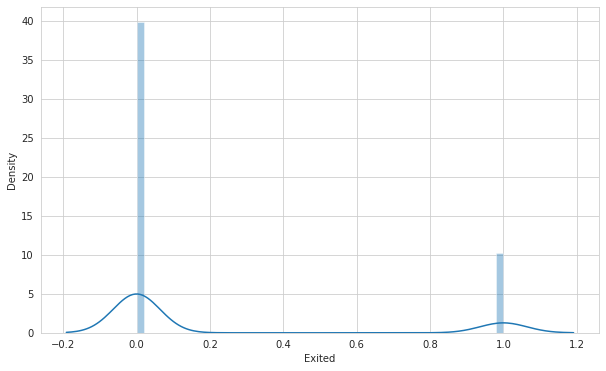

In [85]:
sns.distplot(df['Exited']);

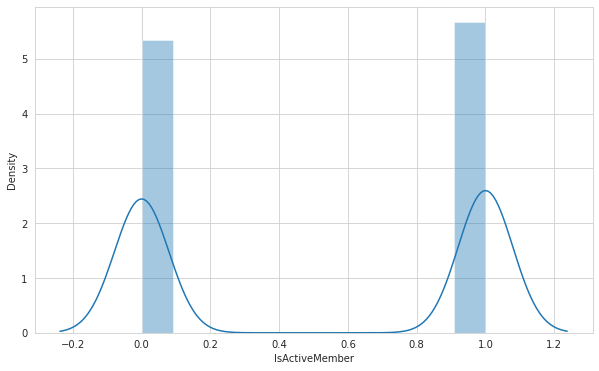

In [87]:
sns.distplot(df['IsActiveMember']);

In [ ]:
df[df["Exited"] == 1].sort_values(by="Exited", ascending=False)

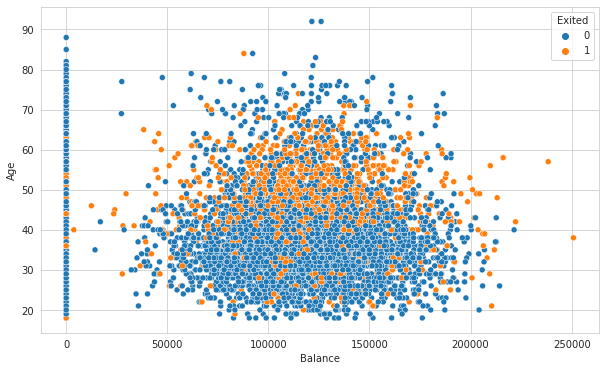

In [88]:
sns.scatterplot(x = 'Balance',y = 'Age', data = df, hue = "Exited");

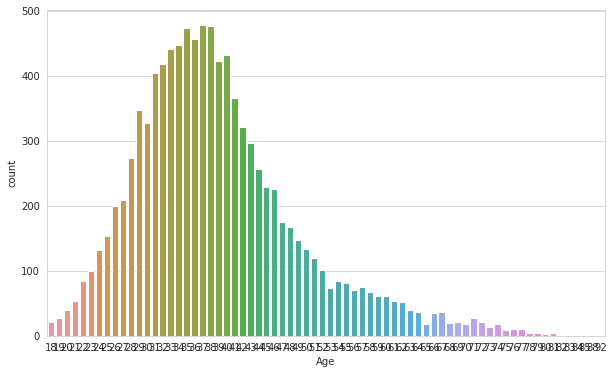

In [89]:
sns.countplot(df['Age']);

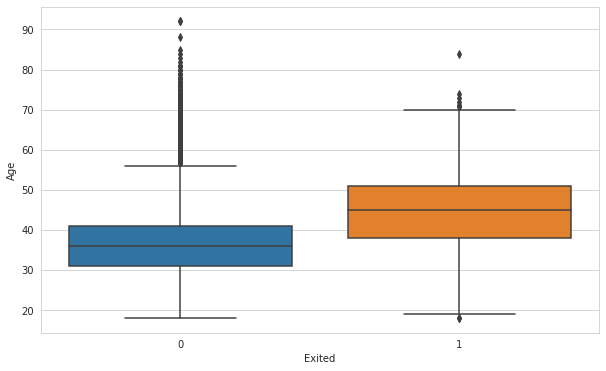

In [90]:
sns.boxplot(x = 'Exited', y = 'Age', data = df);

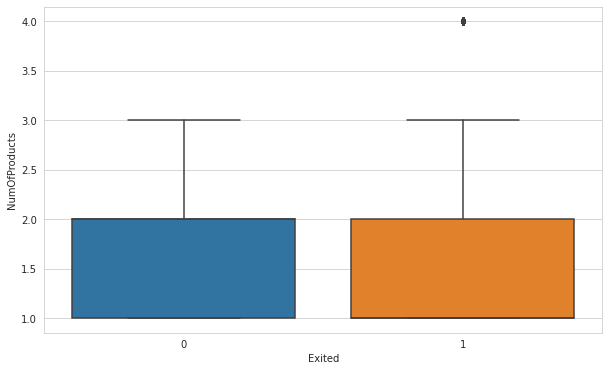

In [91]:
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = df);

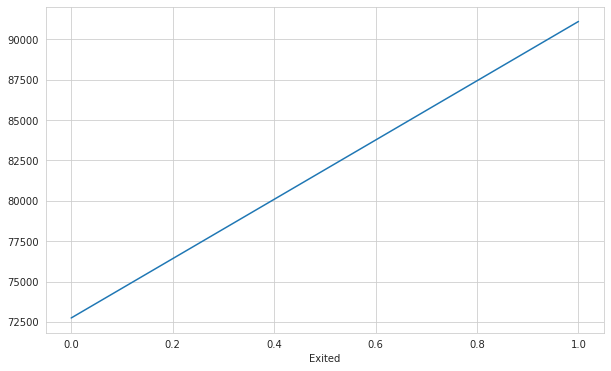

In [92]:
df.groupby('Exited')['Balance'].mean().plot();

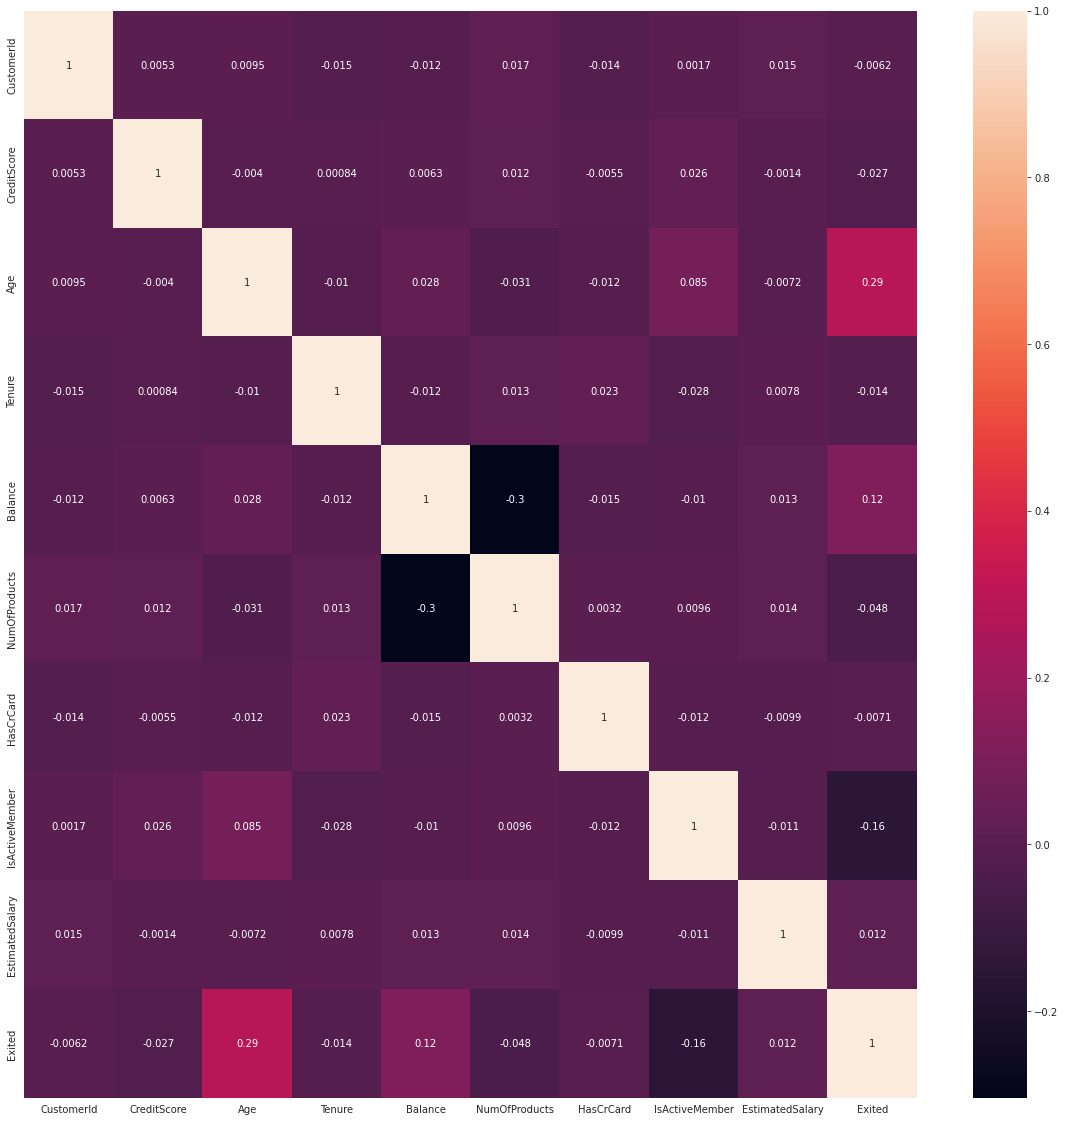

In [93]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [94]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [95]:
drop_list = ["CustomerId", "Surname"]

In [96]:
df=df.drop(drop_list, axis=1)

In [97]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [56]:
df.shape

(10000, 11)

In [98]:
Geography_dummy = pd.get_dummies(df["Geography"], prefix = "Geography")
df = pd.concat([df, Geography_dummy], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1,0,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0,0,1
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1,0,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,1,0,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,0,1


In [99]:
Gender_dummy = pd.get_dummies(df["Gender"], prefix = "Gender")
df = pd.concat([df, Gender_dummy], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


In [100]:
drop_list2 = ["Geography", "Gender"]

In [101]:
df=df.drop(drop_list2, axis=1)

In [102]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [104]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [105]:
seed = 42

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [107]:
scaler = MinMaxScaler()

In [108]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [110]:
X_train.shape

(9000, 13)

In [111]:
X_test.shape

(1000, 13)

In [112]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [113]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
254/254 [==============================] - 3s 4ms/step - loss: 0.5004 - accuracy: 0.7957 - val_loss: 0.4507 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4568 - accuracy: 0.8026 - val_loss: 0.4265 - val_accuracy: 0.8133
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.8104 - val_loss: 0.4057 - val_accuracy: 0.8356
Epoch 4/1000
254/254 [==============================] - 1s 6ms/step - loss: 0.4266 - accuracy: 0.8131 - val_loss: 0.3933 - val_accuracy: 0.8356
Epoch 5/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.4144 - accuracy: 0.8196 - val_loss: 0.3783 - val_accuracy: 0.8444
Epoch 6/1000
254/254 [==============================] - 2s 8ms/step - loss: 0.4001 - accuracy: 0.8286 - val_loss: 0.3620 - val_accuracy: 0.8656
Epoch 7/1000
254/254 [==============================] - 2s 6ms/step - loss: 0.3850 - accuracy: 0.8398 - val_loss: 0.3445 - val_accuracy:

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                504       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


## without class_weigth

In [115]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 36) dtype=float32, numpy=
 array([[ 6.98443770e-01, -4.25525039e-01, -9.79016662e-01,
         -7.20319331e-01, -1.03893816e+00,  9.71523762e-01,
          3.70840371e-01,  2.51065046e-01, -5.98704517e-01,
         -1.39598459e-01, -7.01787829e-01,  1.55602664e-01,
         -1.48602057e+00, -1.52976632e-01,  5.22152781e-02,
          6.14552557e-01,  8.00636504e-03,  2.64624804e-01,
         -8.54140520e-02, -3.37915480e-01, -3.37849468e-01,
         -7.75308490e-01, -2.74646908e-01,  8.99135530e-01,
          9.72717106e-01, -6.21228635e-01, -1.05166721e+00,
         -5.66446841e-01,  4.02090371e-01,  4.10788864e-01,
          8.76369178e-01,  8.09872866e-01, -9.91379097e-03,
         -2.26996914e-01, -1.77754670e-01, -2.75507569e-01],
        [ 1.42316449e+00,  2.14771509e+00, -1.08982170e+00,
         -1.10195386e+00, -1.45581484e-01,  1.18051207e+00,
          1.87518930e+00, -1.95672274e-01,  1.97548163e+00,
         -3.83595854e-01,  9.68

In [116]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.500,0.796,0.451,0.799
1,0.457,0.803,0.426,0.813
2,0.437,0.810,0.406,0.836
3,0.427,0.813,0.393,0.836
4,0.414,0.820,0.378,0.844
...,...,...,...,...
995,0.244,0.896,0.389,0.847
996,0.246,0.896,0.382,0.850
997,0.248,0.896,0.392,0.850
998,0.244,0.895,0.380,0.858


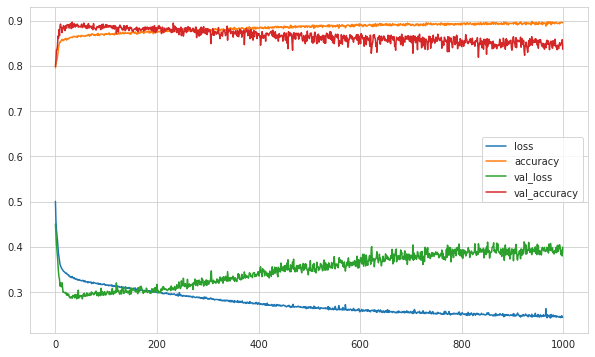

In [117]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [118]:
model.evaluate(X_test, y_test, verbose=0)

[0.427171915769577, 0.8489999771118164]

In [119]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.427171915769577
accuracy :  0.8489999771118164


In [120]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[736  60]
 [ 91 113]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       796
           1       0.65      0.55      0.60       204

    accuracy                           0.85      1000
   macro avg       0.77      0.74      0.75      1000
weighted avg       0.84      0.85      0.84      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [129]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [125]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [130]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [131]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 4s 12ms/step - loss: 0.4646 - accuracy: 0.8021 - val_loss: 0.4150 - val_accuracy: 0.8267
Epoch 2/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.4314 - accuracy: 0.8101 - val_loss: 0.3914 - val_accuracy: 0.8344
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3921 - accuracy: 0.8378 - val_loss: 0.3196 - val_accuracy: 0.8744
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3673 - accuracy: 0.8493 - val_loss: 0.3125 - val_accuracy: 0.8789
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3619 - accuracy: 0.8473 - val_loss: 0.3138 - val_accuracy: 0.8822
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8517 - val_loss: 0.3017 - val_accuracy: 0.8822
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8559 - val_loss: 0.2992 - val_accuracy

### Add Dropout Layer

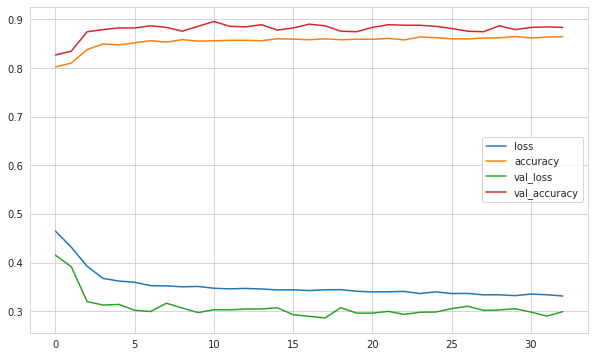

In [134]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [135]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3471659719944
accuracy :  0.859000027179718


In [136]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[759  37]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.73      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [137]:
from tensorflow.keras.optimizers import Adam

In [138]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

### Add Early Stop

In [139]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [140]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4646 - accuracy: 0.8021 - val_loss: 0.4150 - val_accuracy: 0.8267
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4314 - accuracy: 0.8101 - val_loss: 0.3914 - val_accuracy: 0.8344
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3921 - accuracy: 0.8378 - val_loss: 0.3196 - val_accuracy: 0.8744
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3673 - accuracy: 0.8493 - val_loss: 0.3125 - val_accuracy: 0.8789
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3619 - accuracy: 0.8473 - val_loss: 0.3138 - val_accuracy: 0.8822
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8517 - val_loss: 0.3017 - val_accuracy: 0.8822
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8559 - val_loss: 0.2992 - val_accuracy:

#### Monitor the "val_loss" as metric

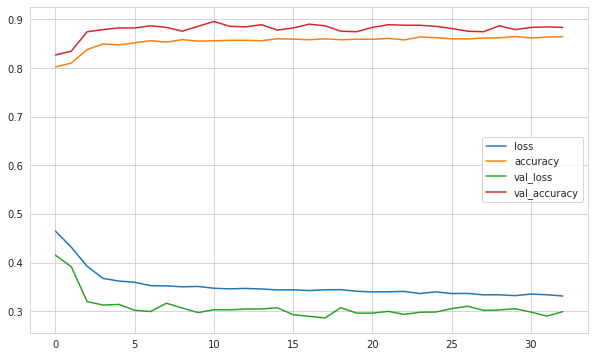

In [141]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [142]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3471659719944
accuracy :  0.859000027179718


In [143]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[759  37]
 [104 100]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.73      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.80      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



#### Monitor the "val_recall" as metric

In [144]:
## Add Dropout Layer

## Add Dropout Layer

In [145]:
from tensorflow.keras.layers import Dropout

In [148]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [149]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [150]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 3s 7ms/step - loss: 0.5801 - accuracy: 0.7551 - val_loss: 0.4955 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.5267 - accuracy: 0.7953 - val_loss: 0.4745 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5094 - accuracy: 0.7960 - val_loss: 0.4672 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.7960 - val_loss: 0.4602 - val_accuracy: 0.7989
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5014 - accuracy: 0.7960 - val_loss: 0.4697 - val_accuracy: 0.7989
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4922 - accuracy: 0.7960 - val_loss: 0.4559 - val_accuracy: 0.7989
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4863 - accuracy: 0.7960 - val_loss: 0.4534 - val_accuracy:

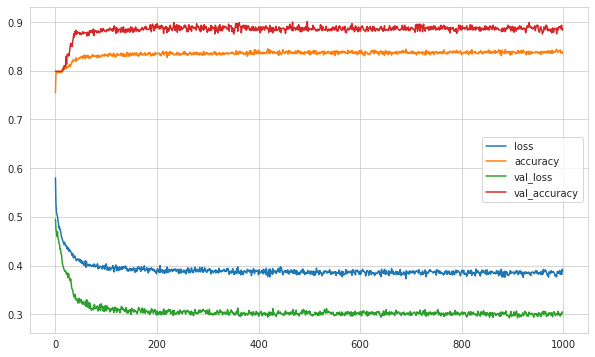

In [151]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [152]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[771  25]
 [116  88]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.43      0.56       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



## GridSearchCV

In [153]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [154]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [155]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [157]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [159]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

### for keras models

In [108]:
#plot_roc_curve(model, X_test, y_test); # it gives an error because of the Sequential model

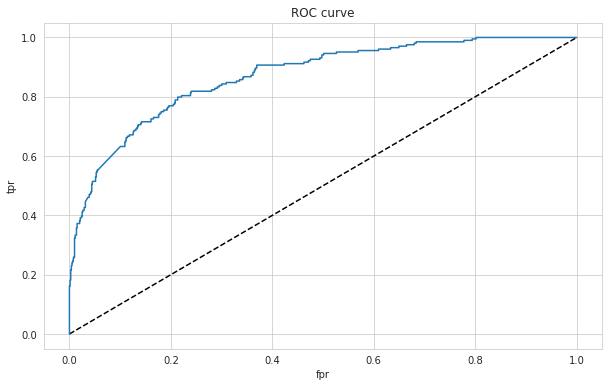

In [166]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [167]:
roc_auc_score(y_test, y_pred_proba)

0.8702212040595133

# Final Model and Model Deployment

In [182]:
import pickle
pickle.dump(scaler, open("scaler_Churn", 'wb'))

In [171]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [172]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [173]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
282/282 [==============================] - 2s 3ms/step - loss: 0.5011 - accuracy: 0.7959 - val_loss: 0.4657 - val_accuracy: 0.7960
Epoch 2/1000
282/282 [==============================] - 1s 3ms/step - loss: 0.4535 - accuracy: 0.8034 - val_loss: 0.4447 - val_accuracy: 0.8050
Epoch 3/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4323 - accuracy: 0.8139 - val_loss: 0.4336 - val_accuracy: 0.7970
Epoch 4/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4205 - accuracy: 0.8168 - val_loss: 0.4265 - val_accuracy: 0.8120
Epoch 5/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8244 - val_loss: 0.4006 - val_accuracy: 0.8240
Epoch 6/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8341 - val_loss: 0.3798 - val_accuracy: 0.8430
Epoch 7/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.3706 - accuracy: 0.8469 - val_loss: 0.3653 - val_accuracy:

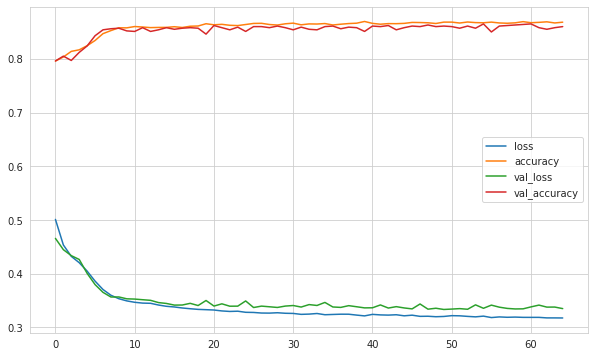

In [174]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [175]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3334398865699768
accuracy :  0.8610000014305115


In [176]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[765  31]
 [108  96]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.76      0.47      0.58       204

    accuracy                           0.86      1000
   macro avg       0.82      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [177]:
model.save('model_Churn.h5')

In [178]:
from tensorflow.keras.models import load_model

In [187]:
model_Churn = load_model('model_Churn.h5')
scaler_Churn = pickle.load(open("scaler_Churn", "rb"))

## Prediction

In [184]:
single_patient = df.drop('Exited', axis = 1).iloc[0:1, :]
single_patient

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0


In [185]:
single_patient = scaler_Churn.transform(single_patient)
single_patient

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [188]:
(model_Churn.predict(single_patient) > 0.5).astype("int32")
#model_Churn.predict_classes(single_patient)

array([[0]], dtype=int32)

In [189]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___